**Main Problem:**

In a region of agricultural significance in India, farmers are grappling with the consequences of both improper use and overuse of pesticides and fertilizers. The indiscriminate application of fertilizers has led to nutrient imbalances in the soil, resulting in reduced crop yields and compromised crop quality. Concurrently, farmers' inadequate awareness and improper handling practices regarding pesticides have exacerbated soil pollution.

**Interesting Questions:**

[Question1: ](#section1) 
What is the crop with the highest average annual yield in each state?


[Question2: ](#section2) 
What is the relationship between the volume of pesticides used and coconut crop yields? 

[Question3: ](#section3)
What will be the total yield of coconut in the coming year? 

[Question4: ](#section4) 
How does the use of fertilizers affect the top 5 crops with highest average annual yield (Question 1)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("crop_yield.csv")
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


#### Column Description:

* Crop: The name of the crop cultivated.
* Crop_Year: The year in which the crop was grown.
* Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
* State: The Indian state where the crop was cultivated.
* Area: The total land area (in hectares) under cultivation for the specific crop.
* Production: The quantity of crop production (in metric tons).
* Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
* Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
* Pesticide: The total amount of pesticide used for the crop (in kilograms).
* Yield: The calculated crop yield (production per unit area).

**Data Preprocessing**

Understand the data type, differentiate between numerical and categorical data

In [3]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

Check for existance of null value and duplicated row then remove trailing white spaces across columns and rows to standardize formatting.

In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Removing whitespace from column names
df.columns = df.columns.str.strip()

# Removing whitespace from string values in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [7]:
df1 = df.copy()

To ensure data accuracy, the yield (production per unit area) is being calculated, and any miscalculated values are being replaced with the correct yield.

In [8]:
# replace miscalculate data in yield column
correct_yield = df1['Production']/df1['Area']

miscalculated_yield = df1[df['Yield'] != correct_yield].index.tolist()
print("Number of miscalculated row:",len(miscalculated_yield))

df1['Yield'] = correct_yield
df1

Number of miscalculated row: 19041


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.768255
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.705891
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.027638
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,6456.298331
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.456584
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.418218
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.019902


Any value equal to 0 is being removed as zero values can skew results and lead to incorrect conclusions during data analysis.

In [9]:
(df1['Production'] == 0).sum()

112

In [10]:
# Remove rows where 'Production' column is equal to 0
df1 = df1[df1['Production'] != 0]

# reset the index after filtering
df1 = df1.reset_index(drop=True)
df1

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.768255
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.705891
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.027638
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,6456.298331
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.456584
...,...,...,...,...,...,...,...,...,...,...
19572,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19573,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19574,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.418218
19575,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.019902


**Exploratory Data Analysis**

Understand the data by examining their numeric values and shape

In [11]:
df1.shape

(19577, 10)

In [12]:
df1.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19577.000000,1.957700e+04,1.957700e+04,19577.000000,1.957700e+04,1.957700e+04,19577.000000
mean,2009.117025,1.809359e+05,1.652997e+07,1438.435141,2.423869e+07,4.912260e+04,84.320436
std,6.501104,7.347985e+05,2.638053e+08,816.492100,9.520010e+07,2.138654e+05,926.213576
min,1997.000000,8.000000e-01,1.000000e+00,301.300000,9.467000e+01,9.000000e-02,0.002330
25%,2004.000000,1.441000e+03,1.448000e+03,940.700000,1.940470e+05,3.703000e+02,0.600000
50%,2010.000000,9.516000e+03,1.408200e+04,1247.600000,1.260839e+06,2.474550e+03,1.041667
75%,2015.000000,7.599400e+04,1.244600e+05,1643.700000,1.013810e+07,2.021952e+04,2.481207
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


Find the unique count and values for season, crop and state.

In [13]:
unique_season = df1["Season"].unique()
print(len(unique_season))
print(unique_season)

6
['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']


In [14]:
unique_crop = df1["Crop"].unique()
print(len(unique_crop))
print(unique_crop)

55
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']


In [15]:
unique_state = df1["State"].unique()
print(len(unique_state))
print(unique_state)

30
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']



Analyzes the data rows by grouping them by 'State' to identify unique seasons, sets display options to show full content

In [16]:
# Group by 'State' and aggregate unique seasons
state_season = df1.groupby('State')['Season'].unique().reset_index()

# Set display options to show all content in 'Season' column
pd.set_option('display.max_colwidth', None)

# Set 'State' as the index
state_season.set_index('State', inplace=True)
state_season.head(10)

,Season
State,
Andhra Pradesh,"[Whole Year, Kharif, Rabi]"
Arunachal Pradesh,"[Kharif, Whole Year, Rabi]"
Assam,"[Whole Year, Kharif, Rabi, Autumn, Summer, Winter]"
Bihar,"[Kharif, Whole Year, Rabi, Summer, Autumn, Winter]"
Chhattisgarh,"[Kharif, Whole Year, Rabi, Summer]"
Delhi,"[Kharif, Rabi, Whole Year]"
Goa,"[Whole Year, Kharif, Rabi]"
Gujarat,"[Kharif, Summer, Whole Year, Rabi]"
Haryana,"[Kharif, Rabi, Whole Year]"


After displaying the options, the data on seasons is found to be incomplete as some seasons do not appear in all states. However, it is found that 'Whole Year' appears in every state. Therefore, the code filters and counts rows containing 'Whole Year' in the 'Season' list and compares this to the total number of states.

In [17]:
state_season.count()

Season    30
dtype: int64

In [18]:
# Filter rows where 'Whole Year' is in the 'Season' list
state_season[state_season['Season'].apply(lambda x: 'Whole Year' in x)].count()

Season    30
dtype: int64

It is found that 'Whole Year' does appear in every state. Hence, the code extracts these rows with 'Whole Year' data into a new dataframe and sort the value by 'Crop_Year' for further examination.

In [19]:
# extract whole year
whole_year_data = df1[df1['Season'].str.contains('Whole Year', case=False)]
# create new data frame
df_wy = whole_year_data.reset_index(drop=True)
df_wy

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.400000,7024878.38,22882.34,0.768255
1,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.400000,1870661.52,6093.36,6456.298331
2,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.400000,1293074.79,4211.97,0.667771
3,Niger seed,1997,Whole Year,Assam,9914.0,5076,2051.400000,943515.38,3073.34,0.512003
4,Onion,1997,Whole Year,Assam,7832.0,17943,2051.400000,745371.44,2427.92,2.290986
...,...,...,...,...,...,...,...,...,...,...
3663,Sugarcane,2008,Whole Year,Goa,1021.0,49253,3271.600000,146043.84,91.89,48.239961
3664,Sugarcane,2009,Whole Year,Goa,893.0,52343,3334.900000,139147.26,151.81,58.614782
3665,Sugarcane,2010,Whole Year,Goa,921.0,49109,4193.300000,152987.31,221.04,53.321390
3666,Sugarcane,2011,Whole Year,Goa,915.0,46584,3340.395455,153280.80,301.95,50.911475


In [20]:
whole_year_data.sort_values(by='Crop_Year', ascending=True)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.400000,7024878.38,22882.34,0.768255
6234,Sugarcane,1997,Whole Year,Mizoram,1252.0,7488,2644.200000,119152.84,388.12,5.980831
6236,Tapioca,1997,Whole Year,Mizoram,478.0,6956,2644.200000,45491.26,148.18,14.552301
6242,Cotton(lint),1997,Whole Year,Punjab,724000.0,937000,690.100000,68903080.00,224440.00,1.294199
6247,Moong(Green Gram),1997,Whole Year,Punjab,49300.0,31700,690.100000,4691881.00,15283.00,0.643002
...,...,...,...,...,...,...,...,...,...,...
17209,Garlic,2020,Whole Year,Uttarakhand,5345.0,39638,1313.947826,1034845.45,1977.65,7.415903
17219,Onion,2020,Whole Year,Uttarakhand,3590.0,49670,1313.947826,695059.90,1328.30,13.835655
17237,Tobacco,2020,Whole Year,Uttarakhand,3.0,6,1313.947826,580.83,1.11,2.000000
17238,Turmeric,2020,Whole Year,Uttarakhand,1299.0,4186,1313.947826,251499.39,480.63,3.222479


Create a correlation matrix heatmap to identify the correlationship between numerical columns.

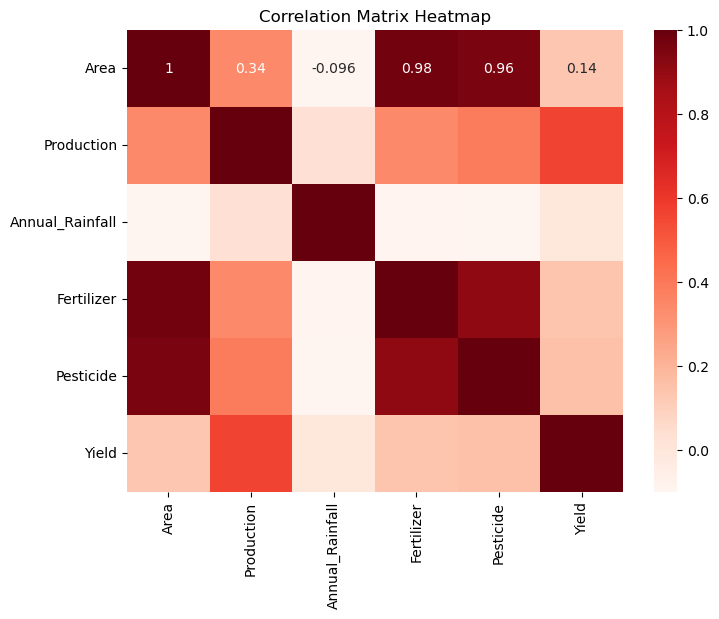

In [21]:
# Select only the numerical columns
numerical_columns = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
df_numerical = df_wy[numerical_columns]

# Plot the heatmap
plt.figure(figsize=(8, 6))    
sns.heatmap(df_numerical.corr(), annot=True, cmap='Reds')

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

<a id="section1"></a>

#### **Q1. What is the crop with the highest average annual yield in each state?**

In [22]:
# Calculate the average yield of crops across states based on data filtered for 'Whole Year' seasons.
avg_yield = df_wy.groupby(['State', 'Crop'])['Yield'].mean().reset_index()
avg_yield.head(20)

,State,Crop,Yield
0,Andhra Pradesh,Arecanut,1.026639
1,Andhra Pradesh,Banana,37.898137
2,Andhra Pradesh,Black pepper,1.000000
3,Andhra Pradesh,Cashewnut,0.250294
4,Andhra Pradesh,Coconut,12854.591892
5,Andhra Pradesh,Coriander,0.443469
6,Andhra Pradesh,Dry chillies,1.852634
7,Andhra Pradesh,Garlic,2.409474
8,Andhra Pradesh,Ginger,5.330469
9,Andhra Pradesh,Onion,14.917194


In [23]:
# Find the crop with the maximum yield for each state
max_yield_crops = avg_yield.loc[avg_yield.groupby('State')['Yield'].idxmax()]

# Set 'State' as the index
max_yield_crops.set_index('State')

,Crop,Yield
State,,
Andhra Pradesh,Coconut,12854.591892
Arunachal Pradesh,Sugarcane,19.407609
Assam,Coconut,7794.523900
Bihar,Sugarcane,49.615539
Chhattisgarh,Bajra,33.858298
Delhi,Sugarcane,69.291667
Goa,Coconut,5040.902387
Gujarat,Banana,69.071166
Haryana,Sugarcane,60.639970


Unique crop: ['Bajra', 'Banana', 'Coconut', 'Potato', 'Sugarcane']


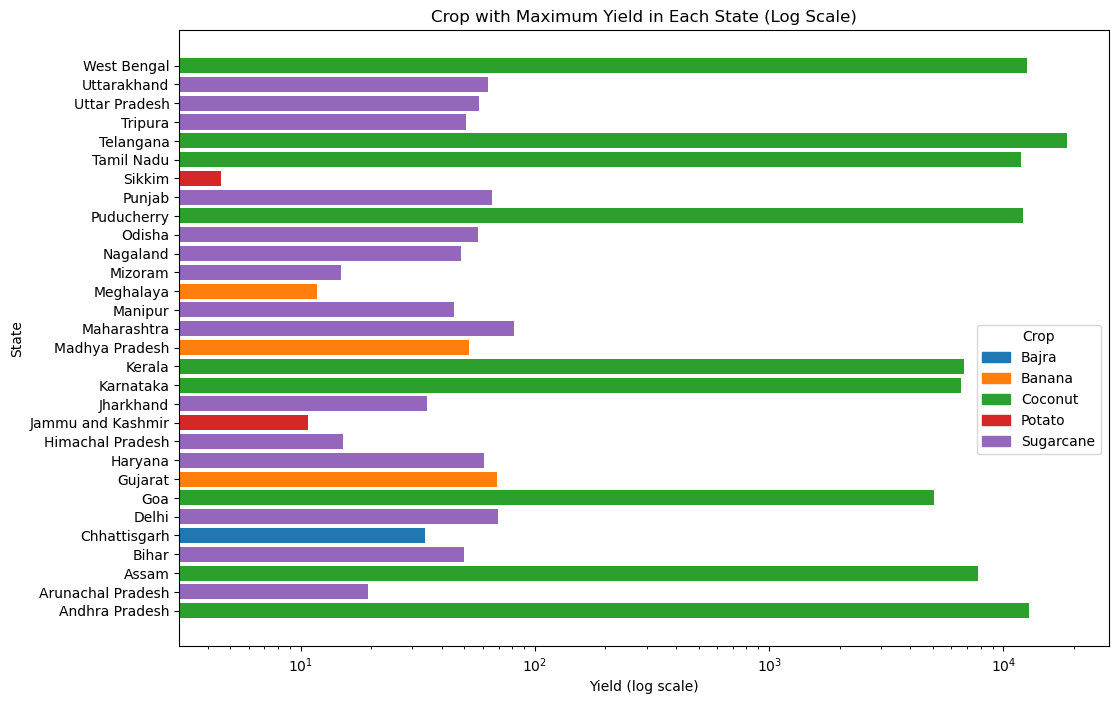

In [24]:
# Prints and displays the unique crops with maximum yield across states and sort alphabetically.
crops = sorted(max_yield_crops['Crop'].unique())
print(f'Unique crop: {crops}')

# Create a color map for the crops
color_map = {crop: color for crop, color in zip(crops, plt.cm.get_cmap('tab10').colors)}

# Assign colors to each row in the DataFrame
colors = max_yield_crops['Crop'].map(color_map)

# Create a horizontal bar chart with a logarithmic scale
plt.figure(figsize=(12, 8))
plt.barh(max_yield_crops['State'], max_yield_crops['Yield'], color=colors)
plt.xscale('log')

plt.xlabel('Yield (log scale)')
plt.ylabel('State')
plt.title('Crop with Maximum Yield in Each State (Log Scale)')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[crop]) for crop in crops]
plt.legend(handles, crops, title='Crop', bbox_to_anchor=(0.85, 0.3))


plt.show()

A horizontal bar chart with a logarithmic scale is chosen to effectively illustrate the difference between data. 

**Answer:** From the result, we can observe that coconut has the most yield in dataset, so it is chosen to be examined.

<a id="section2"></a>

#### **Q2. What is the relationship between the volume of pesticides used and coconut crop yields?**

Since coconut having the most extensive data in Question 1, it is better suited for analysis because it has a larger amount of data, which makes for more accurate and thorough insights. Therefore, it is chosen to explore the relationships between pesticides and maximizing crop yield.

In [25]:
# Extract rows from the dataset where the crop is 'Coconut', reset the index, and store the result in a new dataframe named coconut_data.
coconut_data = df_wy[df_wy['Crop'] == 'Coconut'].reset_index(drop=True)
coconut_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4000,1870661.52,6093.36,6456.298331
1,Coconut,1997,Whole Year,Kerala,884344.0,5210000000,3252.4000,84163018.48,274146.64,5891.372588
2,Coconut,1997,Whole Year,West Bengal,24273.0,306202300,1852.9000,2310061.41,7524.63,12614.934289
3,Coconut,1998,Whole Year,Assam,20166.0,149866000,2354.4000,1992400.80,5848.14,7431.617574
4,Coconut,1998,Whole Year,Goa,24858.0,121000000,2964.9000,2455970.40,7208.82,4867.648242
...,...,...,...,...,...,...,...,...,...,...
159,Coconut,2005,Whole Year,Puducherry,2194.0,29414000,1434.5875,263104.48,460.74,13406.563355
160,Coconut,2004,Whole Year,Goa,25160.0,123520000,2518.0000,2725834.40,5283.60,4909.379968
161,Coconut,2005,Whole Year,Goa,25312.0,125340000,3392.8000,3035415.04,5315.52,4951.801517
162,Coconut,2006,Whole Year,Goa,25468.0,126680000,2928.8000,3252518.28,5602.96,4974.085126


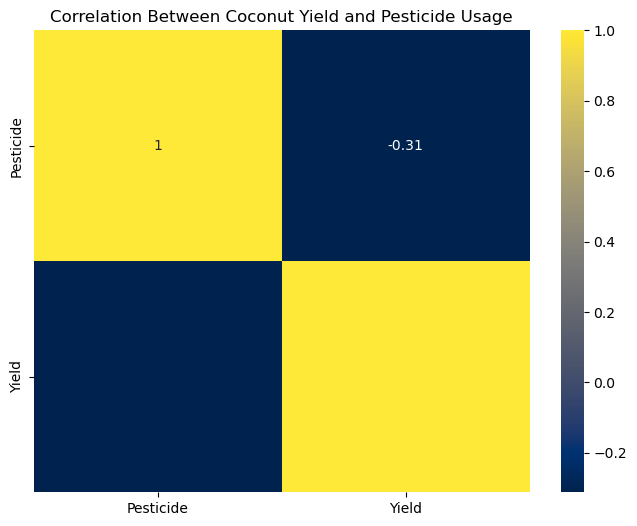

In [26]:
correlation = coconut_data[['Pesticide', 'Yield']]

# Plot the heatmap
plt.figure(figsize=(8, 6))    
sns.heatmap(correlation.corr(), annot=True, cmap='cividis')

# Set the title of the heatmap
plt.title('Correlation Between Coconut Yield and Pesticide Usage')

# Show the plot
plt.show()

A correlation coefficient of -0.31 between coconut yield and pesticide usage suggests a weak negative relationship. This means that, generally, as pesticide usage increases, coconut yield slightly decreases, but the relationship is not strong.

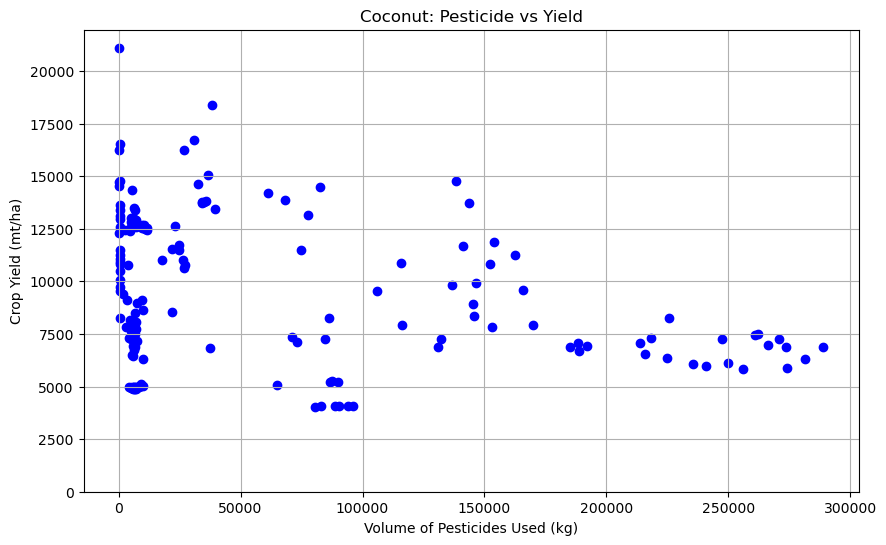

In [27]:
plt.figure(figsize=(10, 6))

# Plot a scatter plot to visualize the relationship between pesticide and yield
plt.scatter(coconut_data['Pesticide'], coconut_data['Yield'], color='blue')
plt.xlabel('Volume of Pesticides Used (kg)')
plt.ylabel('Crop Yield (mt/ha)')
plt.title('Coconut: Pesticide vs Yield')
plt.grid(True)

# Set y-axis to start from 0
plt.ylim(0, None)

plt.show()

**Answer:** The graph clearly shows that the crop yield increases at lower volumes of pesticide use between 0 and 50000 kg. As the volume of pesticides increases beyond 50000 kg, there is a general trend of decreasing crop yield, indicating that overuse of pesticides has a negative impact on coconut yields. This pattern suggests that while overuse of pesticides can result in lower yields, optimal pesticide application is essential for optimizing crop productivity.

<a id="section3"></a>
#### **Q3.What will be the total yield of coconut in the coming year?**

A graph is plot to observe the historical pattern of total coconut yield per year. This visualization allows us to analyze trends and fluctuations in coconut production over time, which can inform predictions about future yield trends and assist in forecasting the yield for the upcoming year.

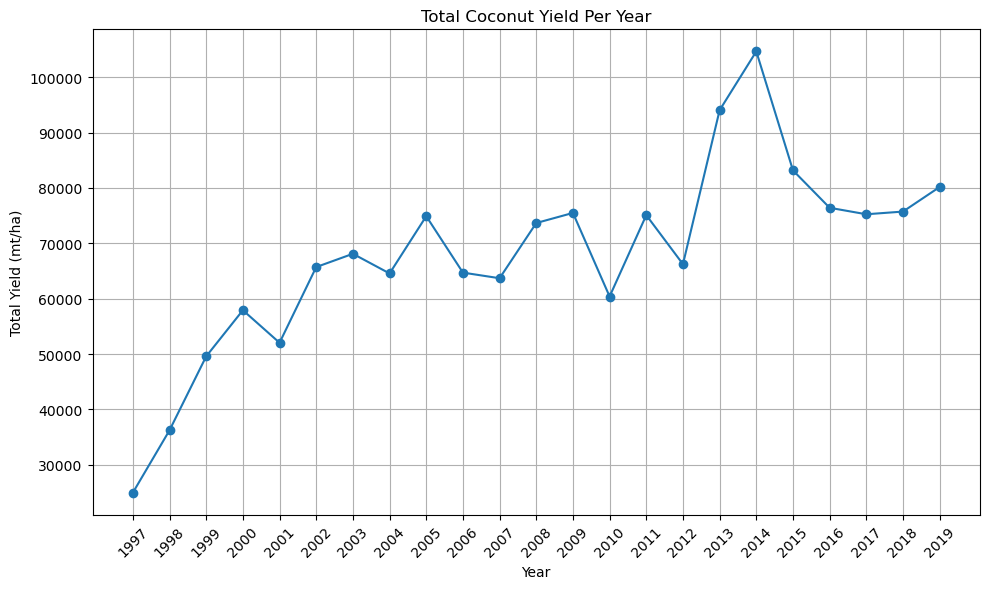

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate yield by year (summing up yields for each year)
yield_by_year = coconut_data.groupby('Crop_Year')['Yield'].sum().reset_index()

# Sort by 'Crop_Year'
yield_by_year_sorted = yield_by_year.sort_values(by='Crop_Year')

# Extract data for plotting
years = yield_by_year_sorted['Crop_Year']
yields = yield_by_year_sorted['Yield']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, yields, marker='o', linestyle='-')
plt.title('Total Coconut Yield Per Year')
plt.xlabel('Year')
plt.ylabel('Total Yield (mt/ha)')
plt.grid(True)
plt.xticks(years, rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [29]:
coconut_data.sort_values(by='Crop_Year', ascending=False).head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
153,Coconut,2019,Whole Year,West Bengal,31300.0,390028000,1733.4,5376088.00,11581.00,12460.958466
130,Coconut,2019,Whole Year,Andhra Pradesh,104027.0,1912224000,899.2,17867677.52,38489.99,18381.996982
131,Coconut,2019,Whole Year,Puducherry,1857.0,18661000,1317.0,318958.32,687.09,10049.003770
132,Coconut,2019,Whole Year,Assam,20800.0,148629000,2084.7,3572608.00,7696.00,7145.625000
133,Coconut,2019,Whole Year,Goa,26542.0,167000000,4489.5,4558853.92,9820.54,6291.914701


The latest crop record in dataset is year 2019, therefore we predict the crop yield for 2020. 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [31]:
# The initial dataset ‘coconut_data’ is copied to a dataframe ‘df_coconut’.
df_coconut = coconut_data.copy()

# Columns that are irrelevant to the prediction task such as ‘Season’ and ‘Crop’ are removed.
df_coconut = df_coconut.drop(['Season', 'Crop'], axis=1)
df_coconut

,Crop_Year,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,Assam,19656.0,126905000,2051.4000,1870661.52,6093.36,6456.298331
1,1997,Kerala,884344.0,5210000000,3252.4000,84163018.48,274146.64,5891.372588
2,1997,West Bengal,24273.0,306202300,1852.9000,2310061.41,7524.63,12614.934289
3,1998,Assam,20166.0,149866000,2354.4000,1992400.80,5848.14,7431.617574
4,1998,Goa,24858.0,121000000,2964.9000,2455970.40,7208.82,4867.648242
...,...,...,...,...,...,...,...,...
159,2005,Puducherry,2194.0,29414000,1434.5875,263104.48,460.74,13406.563355
160,2004,Goa,25160.0,123520000,2518.0000,2725834.40,5283.60,4909.379968
161,2005,Goa,25312.0,125340000,3392.8000,3035415.04,5315.52,4951.801517
162,2006,Goa,25468.0,126680000,2928.8000,3252518.28,5602.96,4974.085126


In [32]:
# The target prediction year (‘2020’) is included in the list of unique crop years to ensure the model accounts for this year in its prediction.
target_year = '2020'
df_coconut['Crop_Year'] = df_coconut['Crop_Year'].astype(str)
crop_years = list(df_coconut['Crop_Year'].unique())
if target_year not in crop_years:
    crop_years.append(target_year)

In [33]:
# Convert categorical into numeric value
label_encoder_state = LabelEncoder()
label_encoder_year = LabelEncoder()

df_coconut['State'] = label_encoder_state.fit_transform(df_coconut['State'])
label_encoder_year.fit(crop_years)
df_coconut['Crop_Year'] = label_encoder_year.transform(df_coconut['Crop_Year'])

In [34]:
# Define features and target
X = df_coconut.drop('Yield', axis=1)
y = df_coconut['Yield']

In [35]:
# Train-test split
# An 80-20 split is used to separate the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Feature scaling - to normalized the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (164, 7)
Shape of y:  (164,)


In [38]:
print('The Shape of X Train: ', X_train.shape)
print('The Shape of X Test: ', X_test.shape)
print('The Shape of y Train: ', y_train.shape)
print('The Shape of y Train: ', y_test.shape)

The Shape of X Train:  (131, 7)
The Shape of X Test:  (33, 7)
The Shape of y Train:  (131,)
The Shape of y Train:  (33,)


In [39]:
# To determine the best performing model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=10, random_state=42)
}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X_train, y_train, cv=3)
    
    return {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": score,
        "Cross-Validation Score": np.mean(cv_scores)
    }

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    for metric, value in results.items():
        print(f"{metric}: {value}")
    print("\n")

Evaluating Linear Regression...
Mean Squared Error: 5834122.716067276
Mean Absolute Error: 2119.192602141267
R^2 Score: 0.56139066577237
Cross-Validation Score: 0.5333599622462879


Evaluating Random Forest Regressor...
Mean Squared Error: 1376224.23643994
Mean Absolute Error: 717.1412369238643
R^2 Score: 0.8965354646328475
Cross-Validation Score: 0.8214725172749889


Evaluating Decision Tree Regressor...
Mean Squared Error: 3771854.0705034137
Mean Absolute Error: 1304.6343274894696
R^2 Score: 0.7164320184573572
Cross-Validation Score: 0.7992344290666052




In [40]:
# Based on the evaluations, the best-performing model, which is the Random Forest Regressor is selected

best_model = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42)
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=42)

In [41]:
# To make predictions for the target year, mean values of features are calculated for each state.
state_means = df_coconut.groupby('State').mean()[['Area','Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
state_means

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
State,,,,,
0,103451.263158,1.326965e+09,915.384211,1.431817e+07,28090.344737
1,20190.772727,1.570650e+08,2078.639256,2.711677e+06,5521.894545
2,25523.823529,1.287635e+08,3291.747059,3.295199e+06,7152.778235
3,421249.454545,2.849644e+09,1174.999380,5.833156e+07,115028.460909
4,835738.951304,5.635092e+09,2900.386957,1.098989e+08,224118.808909
5,2017.200000,2.434935e+07,1434.587500,2.729963e+05,534.024000
6,402184.375000,4.814025e+09,921.581250,5.721327e+07,109003.283750
7,433.500000,8.110904e+06,1047.550000,6.405658e+04,130.215000
8,27986.130435,3.507971e+08,1721.021739,3.774452e+06,7603.114783


In [42]:
# Prepare features for each state
state_predictions = []

for state in state_means.index:
    # Get mean values for the state
    state_mean_values = state_means.loc[state].values
    
    # Create feature array for prediction
    # Transform it into a numeric representation
    encoded_crop_year = label_encoder_year.transform([target_year])[0]
    
    # Create feature array including the encoded state and crop year, and reshape it to be compatible with model prediction.
    state_features = np.array([encoded_crop_year, state] + list(state_mean_values)).reshape(1, -1)
    
    # Scale the features to normalized the data
    state_features_scaled = scaler.transform(state_features)
    
    # Predict the yield
    predicted_yield = best_model.predict(state_features_scaled)[0]
    state_predictions.append((label_encoder_state.inverse_transform([state])[0], predicted_yield))

total_yield = 0

# Print predicted yields for each state
for state, yield_prediction in state_predictions:
    print(f'Predicted Yield for {state}: {yield_prediction}')
    total_yield += yield_prediction

print(f'\nTotal predicted yield: {total_yield}')

Predicted Yield for Andhra Pradesh: 13734.429691007084
Predicted Yield for Assam: 7635.97295426257
Predicted Yield for Goa: 5353.092541691128
Predicted Yield for Karnataka: 8413.489509583505
Predicted Yield for Kerala: 7111.483538994258
Predicted Yield for Puducherry: 11079.141911855162
Predicted Yield for Tamil Nadu: 12828.878562684338
Predicted Yield for Telangana: 16050.753106673641
Predicted Yield for West Bengal: 12548.80991876147

Total predicted yield: 94756.05173551316


**Answer:** The total predicted yield for the upcoming year 2020 is 94756.05 mt/ha. Upon reviewing the plotted graph in above, which shows a general increasing trend over time with some fluctuations, our prediction appears to be validated. The graph’s upward trajectory supports the likelihood of achieving the forecasted yield.

This positive trend in coconut yield suggests that, even in regions facing significant agricultural challenges, implementing better practices can lead to improved outcomes. It highlights the potential for achieving higher yields when sustainable and balanced approaches to fertilizer and pesticide use are adopted.

<a id="section4"></a>
####  **Q4. How does the use of fertilizers affect the top 5 crops with highest average annual yield (Question 1)?** 

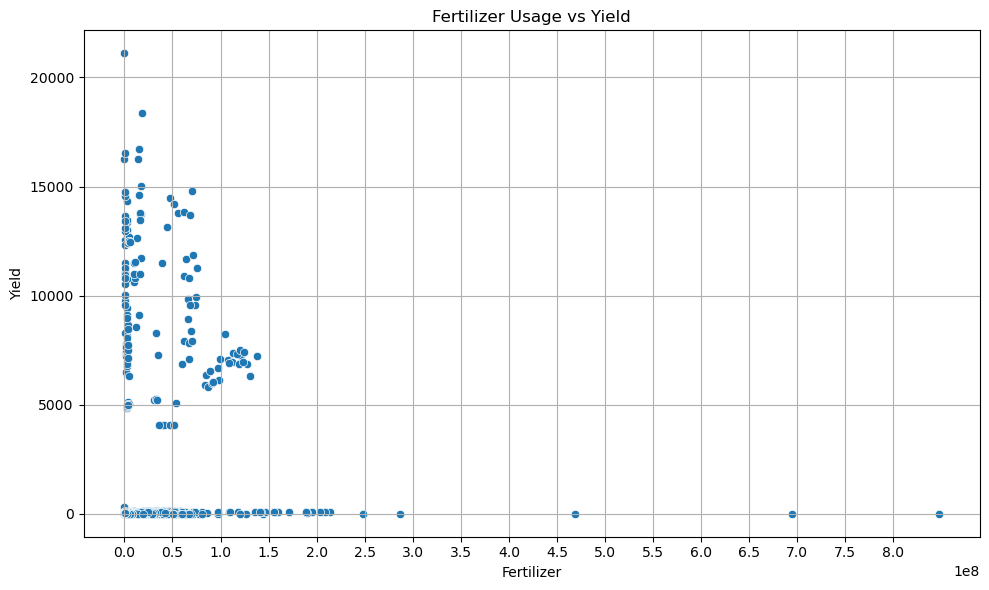

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertilizer', y='Yield', data=df_wy)
plt.title('Fertilizer Usage vs Yield')
plt.xlabel('Fertilizer')
plt.ylabel('Yield')

fertilizer_min = df_wy['Fertilizer'].min()
fertilizer_max = df_wy['Fertilizer'].max()
plt.xticks(np.arange(fertilizer_min, fertilizer_max, 0.5e8))

plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows that crop yields are higher at lower levels of fertilizer usage. It tends to decrease as fertilizer usage increases beyond a certain point, with yields clustering below 15000 units. This pattern indicates that overuse of fertilizers can negatively impact crop yields, emphasizing the importance of optimizing fertilizer application to enhance productivity.

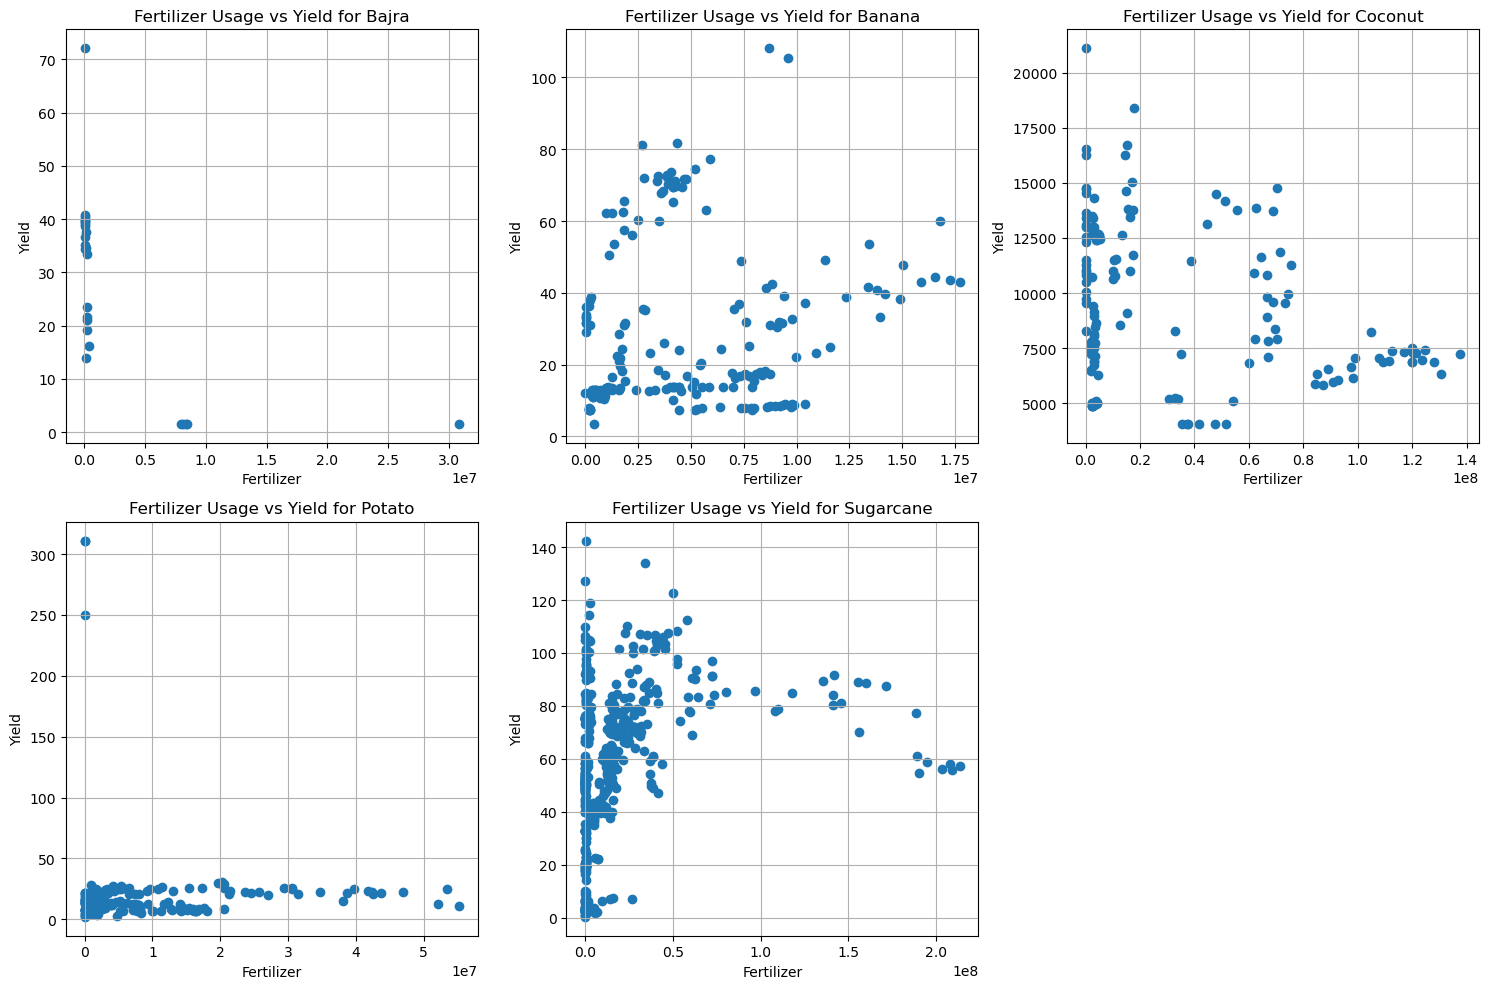

In [44]:
import matplotlib.pyplot as plt

specific_crops = ['Bajra', 'Banana', 'Coconut', 'Potato', 'Sugarcane']
num_crops = len(specific_crops)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the grid size and figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

for i, crop in enumerate(specific_crops):
    crop_data = df_wy[df_wy['Crop'] == crop]
    ax = axes[i]
    ax.scatter(crop_data['Fertilizer'], crop_data['Yield'])
    ax.set_title(f'Fertilizer Usage vs Yield for {crop}')
    ax.set_xlabel('Fertilizer')
    ax.set_ylabel('Yield')
    ax.grid(True)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Answer:** 

1. Bajra: High yields are maintained at low levels of fertilizer usage. Beyond 0.5 × 10^7 kg, further fertilizer does not significantly increase yield.

2. Banana: Yields increase with fertilizer usage up to about 0.75 × 10^7 kg. Beyond this point, yield seems to plateau. 

3. Coconut: Higher yields are achieved with lower fertilizer usage. Excessive fertilizer beyond a certain point tends to decrease coconut yields.

4. Potato: Increasing in fertilizer usage does not lead to higher yields, and in many cases, the yield remains low. 

5. Sugarcane: Optimal yields are achieved with fertilizer usage up to 1.0 × 10^7 kg. Beyond this, yields decline.

In conclusion, the scatter plots collectively highlight the critical balance required in fertilizer usage to maximize crop yields. For all the crops analyzed, there is a clear trend where moderate fertilizer application correlates with higher yields. However, different crops require different range of fertilizer which emphasizes the need for crop-specific fertilizer management to maximize yields. The overuse of fertilizers does not lead to better yields. 
